In [1]:
# Plot identify and plot commonly amplified genes.
# Prerequisites: requires that you identify amplified intervals and genes on those intervals.
# Lots of code example from https://randyzwitch.com/creating-stacked-bar-chart-seaborn/

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import os
import re
import sys

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = (6,8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['svg.fonttype'] = 'none'

sys.path.append(os.path.abspath( '/mnt/c/Users/ochapman/Documents/Mesirov/Software/oscutils'))
import get
os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/amplified-intervals-bed')

# Cohort

In [3]:
subgroups = [
    #'WNT',
    'SHH',
    'G3',
    'G4',
    'Unknown'
]
def load_metadata():
    df = get.medullo_patients()
    df['Subgroup'] = df['Subgroup'].fillna('Unknown')
    return df
def get_cohort_genes():
    pdxdir='/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/amplified-intervals-bed/cohort-genes'
    genedict={}
    for file in os.listdir(pdxdir):
        # Get subgroup
        name = re.split(r'(_D\d?)?(_\d)?\..*\.bed',file)[0]
        assert(name in meta.index)
        subgroup = meta.loc[name,'Subgroup']
        # Get genes
        file = os.path.join(pdxdir,file)
        with open(file) as f:
            for line in f:
                line=line.split()[3]
                if not line in genedict.keys():
                    genedict[line] = dict([(s,0) for s in subgroups])
                genedict[line][subgroup]+=1
    return genedict
meta = load_metadata()
cohort_dict = get_cohort_genes()

In [4]:
def load_cosmic():
    cosmic_genes = '/mnt/c/Users/ochapman/Documents/anno/Census_allSat Oct 24 21_46_07 2020.tsv'
    df = pd.read_csv(cosmic_genes,sep='\t',index_col=0)
    return df.index.to_list()
genes_of_interest = load_cosmic()

In [13]:
genes_of_interest = [
    'MYCN',
    'MYC',
    #'PVT1',
    'CCND2',
    'TERT',
    'PPM1D',
    'ACVR2B',
    #'BCAS3',
    'CLTC',
    'GLI2',
    'RAD51AP1',
    'KCNA1',
    'AKAP9',
    'CDK14',
    'CDK6',
    #'HEPACAM2',
    'DYRK4',
    #'RAD51C',
    #'PPIE',
    'MYCL',
    'MAPK7',
    'EPN2',
    'RAD21',
    'ZC3H3',
    'SRI',
    'FOXM1',
    #'RAD52',
    'BRD9',
    'YBX1',
    'CCN4',
    
    'FOXM1',
    'FOXO3B',
    'RAD51AP2',
    #'SHH',
    #'MAP3K1',
    #'KDM5B',
    #'MDM4',
    #'KMT2E',
    'TOP3A',
]

In [17]:
cohort_df = pd.DataFrame(cohort_dict).transpose()
cohort_df['Total'] = cohort_df.apply(sum,axis='columns')
cohort_df.sort_values('Total',ascending=False,inplace=True)
cohort_df.to_csv('gene_amplification_counts.tsv',sep='\t')

ct = cohort_df.loc[genes_of_interest,]
ct.index.rename('Gene',inplace=True)
ct = ct.sort_values(by=['Total','Gene'],ascending=[False,True])
colors = {
    #'WNT':'blue',
    'SHH':'red',
    'G3':'yellow',
    'G4':'green',
    'Unknown':'grey'
}

In [22]:

def stacked_barplot(svgfile):
    # legend
    l = plt.legend([plt.Rectangle((0,0),1,1,fc=colors[s],edgecolor='none') for s in subgroups],
                  subgroups, loc='upper right',frameon=False,ncol=1,prop={'size':14})
    # plot
    p=recursive_stacked_barplot(subgroups)
    # axes
    sns.despine(left=True)
    p.set_xticklabels(p.get_xticklabels(), rotation=-45,horizontalalignment='left',rotation_mode="anchor")
    p.set_xlabel("ecDNA-amplified genes")
    p.set_ylabel("# Affected cases")
    for item in ([p.xaxis.label, p.yaxis.label] +
             p.get_xticklabels() + p.get_yticklabels()):
        item.set_fontsize(14)
    # save
    plt.savefig(svgfile)


def recursive_stacked_barplot(cats):
    if len(cats) == 0:
        pass
    else:
        # make barplot
        df = ct[cats]
        y = df.apply(sum,axis='columns')
        p=sns.barplot(x = df.index, y=y, color=colors[cats[-1]])
        # recurse
        recursive_stacked_barplot(cats[:-1])
        return p
    


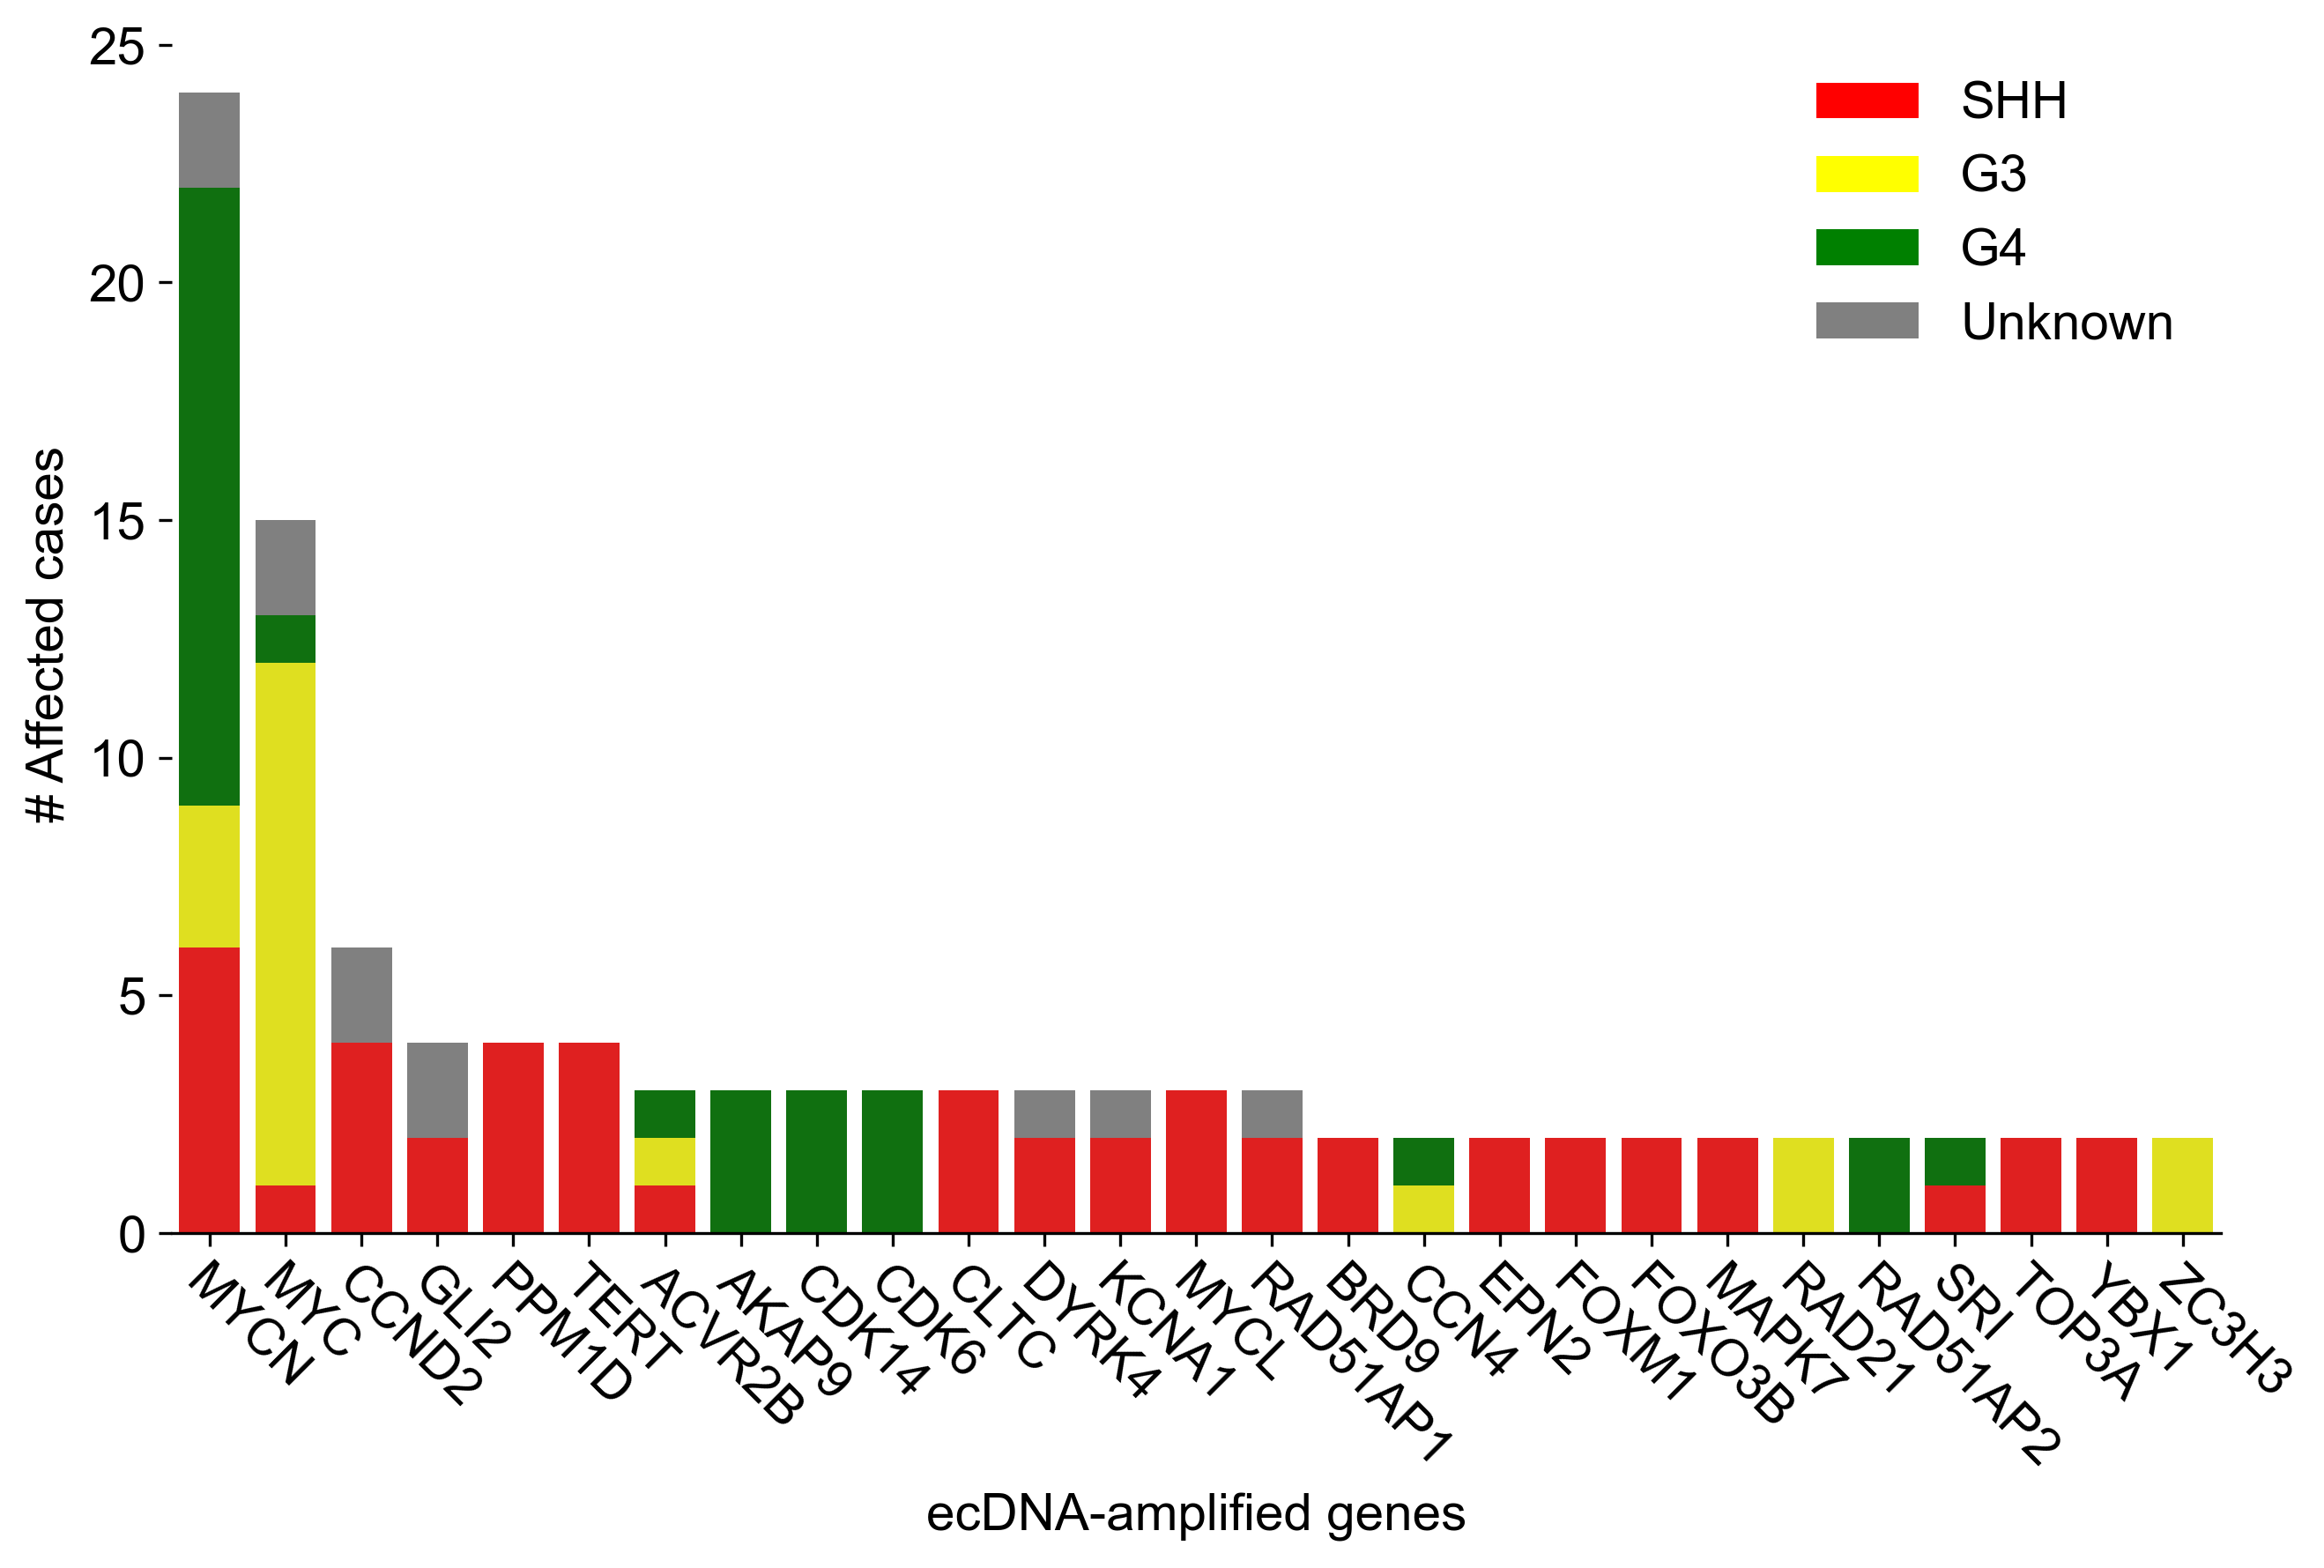

In [23]:
# Plot
#plt.figure(figsize=(6,8))
#sns.barplot(y=pdx.index,x=pdx,orient='h')
#pdx
sns.set_context({"figure.figsize": (10, 6)})
stacked_barplot("F1-3_amplified_genes.svg")

# All Models

# PDX

In [3]:
subgroups = [
    'SHH',
    'SHH-TP53',
    'G3',
    'G4',
]
def load_metadata():
    metadata_file = '/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/Table 2 ecDNA in PDX models.xlsx'
    df = pd.read_excel(metadata_file,index_col="Sample_id")
    df['Subgroup'] = df['Subgroup'].fillna('Unknown')
    return df
def get_pdx_genes():
    pdxdir='/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/amplified-intervals-bed/pdx-genes'
    genedict={}
    for file in os.listdir(pdxdir):
        if not file.endswith('.bed'):
            continue
        # Get subgroup
        name = re.split(r'(_\d)?\..*\.bed',file)[0]
        assert (name in meta.index), name
        
        subgroup = meta.loc[name,'Subgroup']
        # Get genes
        file = os.path.join(pdxdir,file)
        with open(file) as f:
            for line in f:
                line=line.split()[3]
                if not line in genedict.keys():
                    genedict[line] = dict([(s,0) for s in subgroups])
                genedict[line][subgroup]+=1
    return genedict
meta = load_metadata()
pdx_dict = get_pdx_genes()

In [4]:
pdx_df = pd.DataFrame(pdx_dict).transpose()
pdx_df['Total'] = pdx_df.apply(sum,axis='columns')
pdx_df.sort_values('Total',ascending=False,inplace=True)
pdx_df.to_csv('gene_amplification_counts_pdx.tsv',sep='\t')

In [10]:
genes_of_interest = [
    'MYCN',
    'MYC',
    #'PVT1',
    'OTX2',
    'GLI1',
    'GLI2',
    'CDK4',
    'CCND2',
    'TCF3',
    #'AKAP9',
    'CDK6',
    #'KMT2A',
    'YAP1',
    'BIRC3',
    'MYCBP',
    'MYCL',
    'KDM5B',
    'FOXO6',
    'SOX13',
    'MDM4',
    'KMT2E',
]

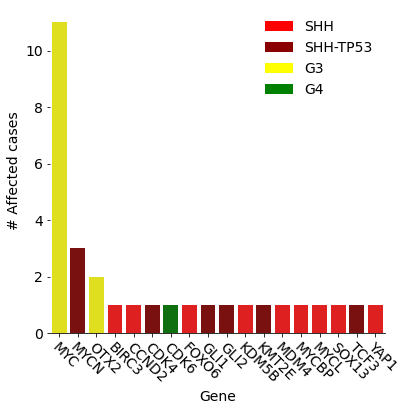

In [11]:
ct = pdx_df.loc[genes_of_interest,]
ct.index.rename('Gene',inplace=True)
ct = ct.sort_values(by=['Total','Gene'],ascending=[False,True])
colors = {
    'SHH':'red',
    'SHH-TP53':'darkred',
    'G3':'yellow',
    'G4':'green',
}
sns.set_context({"figure.figsize": (6, 6)})
stacked_barplot("F2-1_amplified_genes_pdx.svg")

In [9]:
meta

,Sample_type,Subgroup,ecDNA,ecDNA Genes,Origin,dnam_high_cn,Gender
Sample_id,,,,,,,
D341,Cell-line,G3,yes,MYC,"Bagchi Lab, Rich Lab",NaN,NaN
D425,Cell-line,G3,yes,MYC,Bagchi Lab,NaN,NaN
D458,Cell-line,G3,yes,MYC,"Bagchi Lab, Rich Lab",NaN,NaN
MB002,PDX,G3,yes,MYC,"Jae Cho, Stanford University",NaN,NaN
MB009,PDX,G3,yes,MYC,"Robert Wechsler-Reya, SBP",NaN,F
Med211FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,M
Med1911FH,PDX,G3,yes,MYC,"Olson, RWR",NaN,F
Med411FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,F
Med511FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,NaN
